In [1]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
num_input=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=torch.randn(num_examples,num_input,dtype=torch.float32)
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)
print(features[0],labels[0])

tensor([0.6968, 1.0514]) tensor(2.0174)


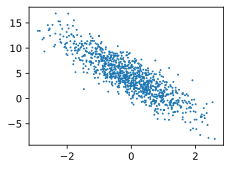

In [45]:
from d2lzh_pytorch import *
set_figsize()

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import * 
#print(features[:, 1].numpy(), labels.numpy())
plt.scatter(features[:, 1].numpy(), labels.numpy(),1);

In [46]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [47]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.6647, -1.2662],
        [ 1.0615,  1.6736],
        [-0.7596, -0.2367],
        [ 1.7411,  0.2365],
        [ 0.2436, -0.4057],
        [ 0.7150,  0.6067],
        [-0.1608,  0.3242],
        [-0.3468, -0.1047],
        [ 0.3041,  0.0069],
        [ 0.0391,  0.0606]]) tensor([7.1658, 0.6426, 3.4982, 6.8903, 6.0688, 3.5615, 2.7804, 3.8577, 4.7809,
        4.0777])


In [48]:
w=torch.tensor(np.random.normal(0,0.01,(num_input,1)),dtype=torch.float32)
b=torch.zeros(1,dtype=torch.float32)

In [49]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [50]:
def linreg(X,w,b):
    return torch.mm(X,w)+b

In [51]:
def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2/2

In [52]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data-=lr*param.grad/batch_size

In [53]:
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.026015
epoch 2, loss 0.000089
epoch 3, loss 0.000052


In [54]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0001],
        [-3.3996]], requires_grad=True)
4.2 
 tensor([4.1994], requires_grad=True)
